# Sleep monitoring dataset  

### Description

Sleep monitoring includes sleep staging, body positioning, respiratory events, heart rate, oxygen saturation and snoring, measured concurrently over three nights.

### Introduction 
<!-- just for sleep: shortened from the original introduction in the data doc -->
Obstructive sleep apnea (OSA) is a sleep disorder in which a person’s breathing is interrupted during sleep due to obstruction of the upper airway as a result of relaxation of the throat muscles. This obstruction can lead to pauses in breathing for short periods of time, which can cause loud snoring, reduction in the  blood oxygen levels, stress response, awakening and fragmented sleep.

A home sleep apnea test (HSAT) is a non-invasive test used to diagnose sleep apnea. During an HSAT, a patient wears a portable device overnight to monitor their breathing, heart rate, oxygen levels, snoring, and other sleep patterns. The device records this data and it is then analyzed by clinically-validated algorithms that compute apnea-related indices. The data can also be used to study sleep architecture and other aspects of sleep, such as heart rate variability (HRV) and arrhythmia.

The device used for sleep monitoring in the Human Phenotype Project is the FDA-approved WatchPAT-300 by Itamar Medical. This device contains 5 sensors: An actigraph worn on the wrist; a pulse oximeter and a Peripheral Arterial Tone (PAT) probe worn on the finger; and a microphone and accelerometer worn on the chest for respiratory effort, snoring and body position measurement (RESBP).

The PAT probe measures changes in the volume of blood vessels by applying a uniform pressure field over the covered finger, preventing venous blood accumulation while measuring changes in the flow within the probe with a photoplethysmogram (PPG) sensor. The measured PAT signal is a physiological signal that reflects changes in the autonomic nervous system caused by respiratory disturbances during sleep. WatchPAT's algorithm analyzes the PAT signal amplitude, heart rate, and oxygen saturation to identify and classify sleep-related breathing problems.

The device's algorithms provide 3 main indices for diagnosis of OSA: Apnea/Hypopnea Index (AHI), Respiratory Disturbance Index (RDI), Oxygen Desaturation Index (ODI). The device's algoithms also provide indices for diagnosis of Atrial Fibrillation (not FDA-approved yet): Premature beats per minute, Atrial fibrillation longest event.

In addition to the above, the device's algorithms provide statistics on sleep architecture. Furthermore, we use [NeuroKit2](https://neuropsychology.github.io/NeuroKit/) ([Makowski et al., 2021](https://doi.org/10.3758/s13428-020-01516-y)) to compute HRV indices from the PAT channel.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
The WatchPAT device is given to participants during the visit to the clinical testing center who then record 3 nights of sleep at home during the following two weeks (see figure below). Participants who use CPAP/BiPap devices are asked to report the usage of CPAP/BiPap devices in the 10K App per the monitored nights.

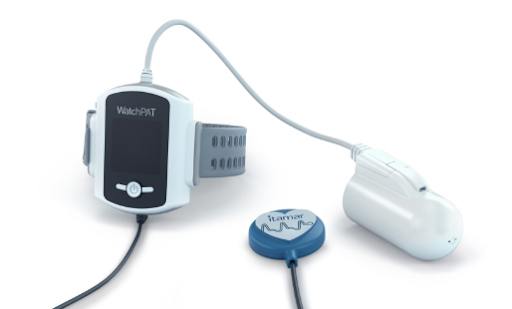

Figure 1: WatchPAT-300 device. (Source: Itamar Medical)

General guidelines: Once the device is turned on it cannot be turned off, and should therefore be turned on only when the participant is ready to go to sleep. The device should not be removed if the participant needs to get up during the night. The device will turn off automatically when the participant wakes up. The PAT probe is replaced each night, and 3 probes are provided to each participant. Finally, the device is returned to the clinic and the data is analyzed.

PAT setup: It is recommended to apply the WatchPAT device on the non-dominant hand. The PAT probe can be worn on any finger, except the thumb. In the case of large fingers, the pinky is recommended. Before use, it is recommended to remove tight clothes, rings, watches and other jewelry. Artificial nails and nail polish should be removed from the test finger, and the fingernail should be cut short. The finger is inserted into the probe until reaching its end, until the sticker marked TOP is on the top of the finger above the nail. The finger is then pressed against a hard surface. Finally, the top tab is removed.

RESBP setup: Trim thick chest hair, if needed. Stick the sensor to the center of the upper chest bone, just below the front of the neck. The image on the RESBP sensor should be facing up. Secure the sensor using the provided sticker on its back and additional medical tape.

WatchPAT device setup: It is strapped on the wrist of the non-dominant hand.

### Data availability 
<!-- for the example notebooks -->
The information is stored in 2 main statistics parquet files: `sleep.parquet`, `hrv.parquet` (computed using NeuroKit2); In multiple events parquets and in multiple time series parquets / EDF files containing sensor channels for each night of logging.

```{mermaid}
flowchart LR;

classDef sensor fill:#a1c9f4;
classDef raw fill:#ffb482;
classDef event fill:#8de5a1;
classDef stat fill:#ff9f9b;

Sensor(sleep sensor):::sensor --> Raw(raw channel):::raw
Raw -->|zzzPAT| Events(sleep events):::event
Raw -->|NeuroKit2| Extracted(computed stats)
Events --> Extracted
Events -->|zzzPAT| Summary(summary stats):::stat
```

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/009-sleep.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/9)

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

from pheno_utils import PhenoLoader

In [2]:
pl = PhenoLoader('sleep', base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for sleep with
473 fields
3 tables: ['sleep', 'hrv', 'age_sex']

# Data dictionary

In [3]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,units,...,stability,sexed,debut,completed,transformation,list_of_tags,min_plausible_value,max_plausible_value,dependency,parent_dataframe
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
collection_timestamp,Collection timestamp,Collection timestamp,9.0,"sleep,sleep_raw",Datetime,Primary,NaN,Multiple,"datetime64[ns, Asia/Jerusalem]",Time,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
collection_date,Collection date,Collection date,9.0,"sleep,sleep_raw",Date,Primary,NaN,Multiple,datetime64[ns],Date,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
night,Night,Night,9.0,"sleep,sleep_raw",Integer,Primary,NaN,Multiple,int,NaN,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
warnings,Warnings,Analysis warnings,9.0,"sleep,sleep_raw",Categorical (multiple),Primary,009_04,Multiple,object,Text,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
timezone,Timezone,Timezone,9.0,"sleep,sleep_raw",Categorical (single),Auxiliary,001_03,Multiple,category_ordered,Text,...,Accruing,Both sexes,2020-01-15,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REM,REM,REM,9.0,events_time_series,rows: event,NaN,NaN,NaN,string,Text,...,Accruing,NaN,NaN,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,events_time_series
REM Period,REM Period,REM Period,9.0,events_time_series,rows: event,NaN,NaN,NaN,string,Text,...,Accruing,NaN,NaN,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,events_time_series
Resp. Event,Resp. Event,Resp. Event,9.0,events_time_series,rows: event,NaN,NaN,NaN,string,Text,...,Accruing,NaN,NaN,NaN,NaN,Sleep Monitoring,NaN,NaN,NaN,events_time_series


# Sleep plot

In [4]:
from pheno_utils.sleep_plots import plot_sleep

In [5]:
# load all channels from a participant's single night (array_index)
plot_df_raw = pl.load_bulk_data(
    'channels_time_series',
    research_stage='00_00_visit',
    array_index=0
)
plot_df_raw

values
participant_id cohort research_stage array_index source    collection_timestamp                    
5309837561     10k    00_00_visit    0           actigraph 2020-06-22 00:38:58+03:00         1437.0
                                                           2020-06-22 00:38:58.010000+03:00  1477.0
                                                           2020-06-22 00:38:58.020000+03:00  1507.0
                                                           2020-06-22 00:38:58.030000+03:00  1528.0
                                                           2020-06-22 00:38:58.040000+03:00  1544.0
...                                                                                             ...
                                                 spo2      2020-06-22 03:46:59+03:00           98.0
                                                           2020-06-22 03:47:00+03:00            NaN
                                                           2020-06-22 03:47:01+03:00            NaN
                                                           2020-06-22 03:47:02+03:00            NaN
                                                           2020-06-22 03:47:03+03:00            NaN

[3103650 rows x 1 columns]

In [6]:
# load all events from a participant's single night (array_index)
plot_df_events = pl.load_bulk_data(
    'events_time_series',
    research_stage='00_00_visit',
    array_index=0
)
plot_df_events

event_end  \
participant_id cohort research_stage array_index collection_timestamp                                  
5309837561     10k    00_00_visit    0           2020-06-22 00:38:58+03:00 2020-06-22 00:39:04+03:00   
                                                 2020-06-22 00:38:58+03:00 2020-06-22 00:39:03+03:00   
                                                 2020-06-22 00:38:58+03:00 2020-06-22 00:43:58+03:00   
                                                 2020-06-22 00:38:58+03:00 2020-06-22 00:39:03+03:00   
                                                 2020-06-22 00:38:58+03:00 2020-06-22 00:39:02+03:00   
...                                                                                              ...   
                                                 2020-06-22 03:46:38+03:00 2020-06-22 03:46:51+03:00   
                                                 2020-06-22 03:46:59+03:00 2020-06-22 03:47:03+03:00   
                                                 2020-06-22 03:47:00+03:00 2020-06-22 03:47:03+03:00   
                                                 2020-06-22 03:47:04+03:00 2020-06-22 03:47:04+03:00   
                                                 2020-06-22 10:42:58+03:00 2020-06-22 10:42:58+03:00   

                                                                                           event  \
participant_id cohort research_stage array_index collection_timestamp                              
5309837561     10k    00_00_visit    0           2020-06-22 00:38:58+03:00              Excluded   
                                                 2020-06-22 00:38:58+03:00              Excluded   
                                                 2020-06-22 00:38:58+03:00                  Wake   
                                                 2020-06-22 00:38:58+03:00          Invalid Time   
                                                 2020-06-22 00:38:58+03:00              Artifact   
...                                                                                          ...   
                                                 2020-06-22 03:46:38+03:00  Pat Amplitude Change   
                                                 2020-06-22 03:46:59+03:00          Invalid Time   
                                                 2020-06-22 03:47:00+03:00              Excluded   
                                                 2020-06-22 03:47:04+03:00            Fine Trunc   
                                                 2020-06-22 10:42:58+03:00           Gross Trunc   

                                                                                   channel  \
participant_id cohort research_stage array_index collection_timestamp                        
5309837561     10k    00_00_visit    0           2020-06-22 00:38:58+03:00  heart_rate_raw   
                                                 2020-06-22 00:38:58+03:00            spo2   
                                                 2020-06-22 00:38:58+03:00       actigraph   
                                                 2020-06-22 00:38:58+03:00         general   
                                                 2020-06-22 00:38:58+03:00       pat_infra   
...                                                                                    ...   
                                                 2020-06-22 03:46:38+03:00   pat_amplitude   
                                                 2020-06-22 03:46:59+03:00         general   
                                                 2020-06-22 03:47:00+03:00            spo2   
                                                 2020-06-22 03:47:04+03:00       pat_infra   
                                                 2020-06-22 10:42:58+03:00       pat_infra   

                                                                            start  \
participant_id cohort research_stage array_index collection_timestamp               
5309837561     10k    00_00_visit    0      

The sleep plot provided in `pheno-utils` displays raw and derived sensor channels from the WatchPAT device, along with various sleep events that were detected by the device algorithms (such as sleep stages, respiratory and heart events). Events are colored based on the channel that is most closely associated with them.

You may select the channels / events that are displayed by passing `channel_filter` and `events_filter` arguments.

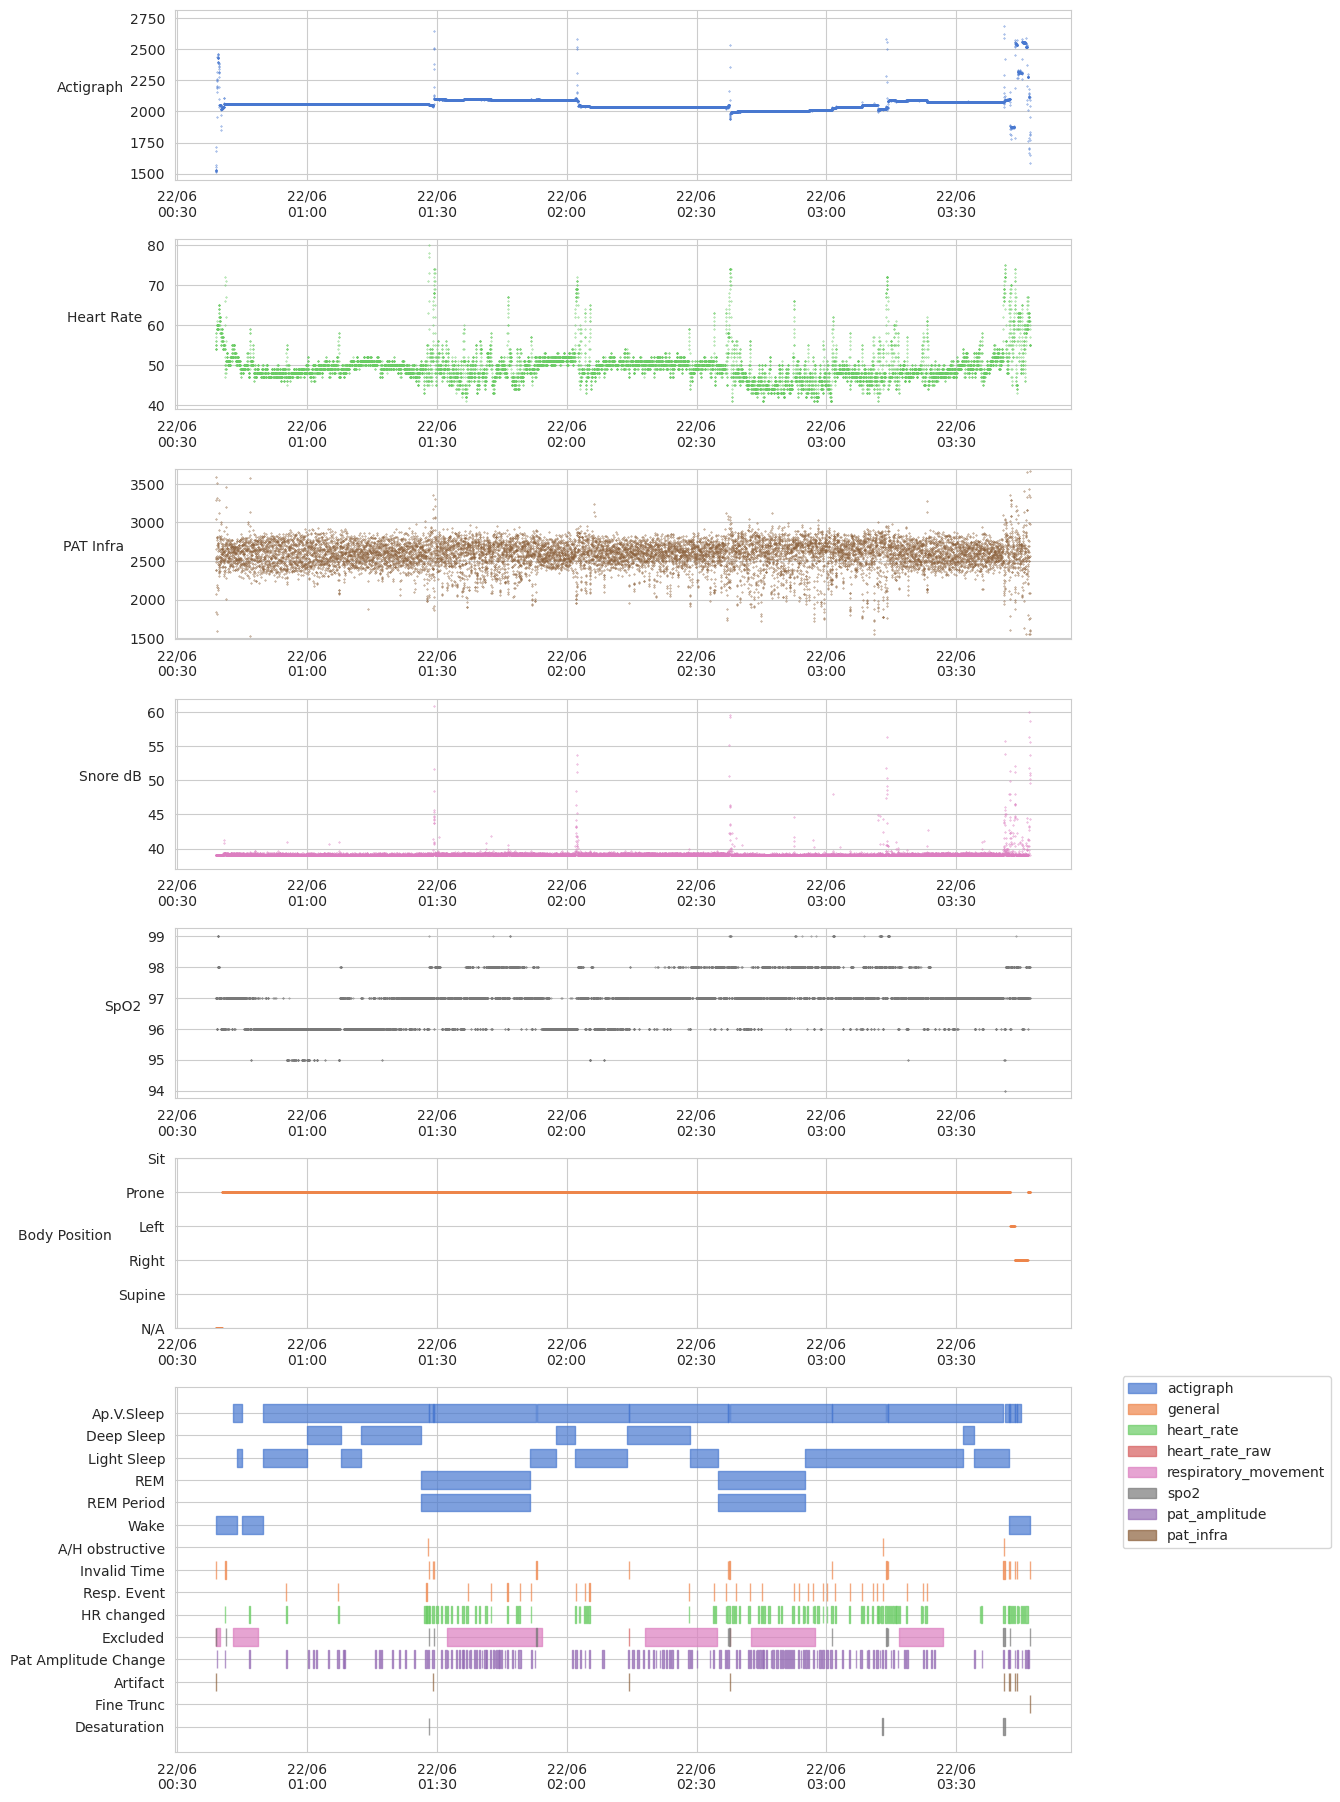

In [7]:
# plot raw channels and events combined
g = plot_sleep(plot_df_events, plot_df_raw, array_index=0, channel_height=0.7, event_height=1.5)

# Advanced loading of time series data

In [ ]:
# Load a subset of the channels for a single night, and pivot the data.
# You can access the channels by their name (e.g., actigraph, snore_db),
# although they are contained in the same file.
pl.load_bulk_data(
    ['heart_rate', 'spo2', 'sleep_stage'],
    participant_id=5309837561,
    research_stage='00_00_visit',
    array_index=0,
    pivot='source'
)

6	bulk fields found in channels_time_series


/home/ec2-user/projects/pheno-utils/pheno_utils/pheno_loader.py:257: UserWarning: Missing samples: [5309837561]
  warnings.warn(f'Missing samples: {missing_participants}')


# Advanced loading of tabular fields

In [ ]:
# load heart rate variability frequency domain features
pl.get('hrv_frequency', flexible=True)

,,,,hrv_frequency_hf_during_night,hrv_frequency_hf_during_nrem,hrv_frequency_hf_during_rem,hrv_frequency_hf_during_wake,hrv_frequency_hfn_during_night,hrv_frequency_hfn_during_nrem,hrv_frequency_hfn_during_rem,hrv_frequency_hfn_during_wake,hrv_frequency_lf_during_night,hrv_frequency_lf_during_nrem,...,hrv_frequency_ulf_during_rem,hrv_frequency_ulf_during_wake,hrv_frequency_vhf_during_night,hrv_frequency_vhf_during_nrem,hrv_frequency_vhf_during_rem,hrv_frequency_vhf_during_wake,hrv_frequency_vlf_during_night,hrv_frequency_vlf_during_nrem,hrv_frequency_vlf_during_rem,hrv_frequency_vlf_during_wake
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,,,,,,,,,
9327581971,10k,02_00_visit,0,5.229298e-04,0.000115,0.000408,5.018908e-08,5.512541e-07,0.073398,0.013944,NaN,0.000397,0.000087,...,0.000374,NaN,0.000211,0.000001,0.002656,0.001871,0.001200,0.000164,0.009906,0.002991
9183631221,10k,00_00_visit,0,1.190678e-09,0.000115,0.000077,5.018908e-08,1.403594e-01,0.348722,0.107689,0.213275,0.003236,0.018319,...,0.001744,NaN,0.000211,0.000001,NaN,0.004816,NaN,0.001264,0.011429,0.004608
2763404431,10k,00_00_visit,0,1.190678e-09,0.000115,0.000077,NaN,1.380723e-01,0.089103,NaN,0.450626,0.002446,0.000332,...,0.001155,NaN,0.000211,0.000001,0.000155,NaN,0.001189,0.002845,0.001521,NaN
9704705313,10k,02_01_visit,0,1.190678e-09,0.001025,0.000787,1.439396e-03,1.944988e-01,0.185635,NaN,NaN,0.003076,0.001147,...,NaN,NaN,0.000211,0.000001,0.003480,0.004509,0.003926,0.003230,0.005541,0.005494
2898716336,10k,00_00_visit,0,1.190678e-09,0.000115,0.000077,5.018908e-08,4.681513e-02,0.086960,0.013944,0.582961,0.005156,0.003855,...,0.001744,NaN,0.000211,0.000001,0.002187,0.006161,0.004319,0.000155,0.005515,0.005467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005633809,10k,01_01_visit,0,1.190678e-09,0.000115,0.000915,2.817839e-02,1.449264e-01,0.063618,0.073325,0.499257,0.001789,0.010305,...,0.000041,NaN,0.000211,0.000001,0.000887,0.000199,0.000338,0.006536,0.001945,0.000413
9101780625,10k,02_00_visit,0,1.190678e-09,0.000411,0.000077,1.632693e-03,8.689334e-02,0.363980,0.013944,0.299017,0.003764,0.015798,...,0.001384,NaN,0.000211,0.000001,0.003009,NaN,0.004316,0.000113,NaN,NaN
9297271434,10k,02_00_visit,0,1.933923e-04,0.000115,0.007131,5.018908e-08,1.545781e-01,0.131884,0.013944,0.482761,0.003196,0.002809,...,0.000041,NaN,NaN,0.000001,0.002091,0.003700,0.003014,0.002957,NaN,0.007105


In [10]:
# get all available features on REM sleep from the main sleep dataframe (sleep.parquet)
pl.get('during_rem', flexible=True, relative_location='sleep/sleep.parquet')

,,,,ahi_central_during_rem,ahi_during_rem,heart_rate_max_during_rem,heart_rate_mean_during_rem,heart_rate_min_during_rem,odi_during_rem,rdi_during_rem
participant_id,cohort,research_stage,array_index,,,,,,,
9327581971,10k,02_00_visit,0,1.999814,16.993510,104.701861,73.550025,50.226026,6.109660,16.905647
9183631221,10k,00_00_visit,0,NaN,10.746193,128.961839,78.971161,61.691641,6.729891,NaN
2763404431,10k,00_00_visit,0,0.603108,10.260602,116.907198,61.649665,58.453181,0.642758,10.352092
9704705313,10k,02_01_visit,0,0.000000,3.753656,97.717894,72.883306,46.239414,1.468974,27.969614
2898716336,10k,00_00_visit,0,0.000000,NaN,112.772709,38.067361,50.547433,1.265375,1.820000
...,...,...,...,...,...,...,...,...,...,...
9005633809,10k,01_01_visit,0,1.701602,12.762600,98.813176,NaN,46.769421,8.722261,21.411663
9101780625,10k,02_00_visit,0,NaN,10.919146,111.110011,51.613315,68.000000,0.000000,6.743391
9297271434,10k,02_00_visit,0,0.386714,4.255477,125.241021,NaN,61.687974,0.000000,10.808458


In [11]:
# get all fields that are measured in percentage
pl.get('', flexible=True, units='Percentage')

,,,,ahi_rdi_desaturation_threshold,csr_percent,percent_of_deep_sleep_time,percent_of_light_sleep_time,percent_of_rem_sleep_time,quality_score_heart_rate,quality_score_pat,quality_score_sbp,quality_score_spo2,saturation_max_value,saturation_mean,saturation_min_value,sleep_efficiency
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,
9327581971,10k,02_00_visit,0,3.0,0.0,31.932413,52.944148,28.076202,99.828605,99.625809,98.070146,99.226099,98,95,90,78.156441
9183631221,10k,00_00_visit,0,3.0,NaN,27.889212,49.727033,26.042743,99.821194,99.502138,97.283683,99.712595,99,95,90,71.374213
2763404431,10k,00_00_visit,0,3.0,0.0,28.833590,70.948536,27.917931,99.880730,98.241858,83.897525,98.787747,99,95,85,81.347252
9704705313,10k,02_01_visit,0,3.0,0.0,37.721617,77.309154,15.557149,99.559432,99.437867,99.854007,99.712595,99,0,87,79.564825
2898716336,10k,00_00_visit,0,3.0,0.0,37.721617,49.829572,NaN,99.557545,99.440290,96.796410,99.712595,100,98,65,78.308436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005633809,10k,01_01_visit,0,3.0,0.0,22.762204,65.289312,28.995051,99.925730,99.245627,91.253705,98.685037,99,94,86,83.944338
9101780625,10k,02_00_visit,0,3.0,0.0,28.623350,68.498725,13.755432,99.714519,99.493391,98.620596,98.712606,99,95,84,87.928539
9297271434,10k,02_00_visit,0,3.0,0.0,33.083917,59.211089,25.216859,99.808132,99.377081,99.022574,99.712595,99,95,87,88.685209


# Plot histogram and ecdf for log-AHI at baseline visit


In [12]:
from pheno_utils.basic_plots import hist_ecdf_plots

In [ ]:
# filter out baseline visit
col = 'ahi'

# load the baseline visit, average over 3 nights
df = pl[col]\
    .loc[:,:,'00_00_visit',:,:]\
    .groupby('participant_id').mean()
df['ahi'] = np.log1p(df['ahi'])
df = df.join(pl[['age', 'sex', 'collection_date']])\
    .loc[:,:,'00_00_visit',:,:]\
    .groupby('participant_id').first()

df.head()

,ahi,age,sex,collection_date
participant_id,,,,
1008549674,1.981798,54.076323,Male,2021-05-03 10:59:10.678266624
1013278430,2.492182,52.951624,Female,2022-01-29 23:47:49.686752512
1023812991,1.671479,46.108067,Female,2021-08-22 06:00:46.381267712
1058766183,1.677957,55.977894,Female,2022-08-05 18:01:55.212064000
1063850013,2.504606,44.156043,Male,2021-08-28 18:51:22.577827328


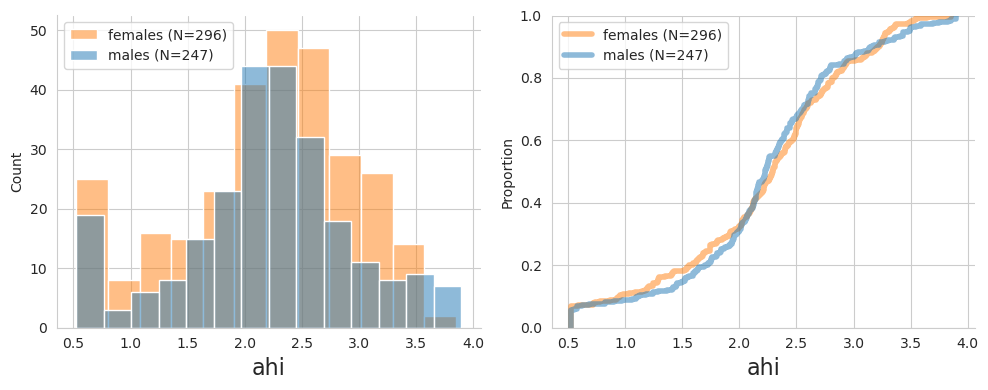

,count,mean,std,min,25%,50%,75%,max
ahi,543.0,2.192267,0.770206,0.524729,1.795814,2.25625,2.673386,3.898735


In [ ]:
# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col, 'sex', 'age']), col, gender_col='sex')

# stats
display(df[col].describe().to_frame().T)

# Plot age-sex reference plots

In [15]:
from pheno_utils.age_reference_plots import GenderAgeRefPlot

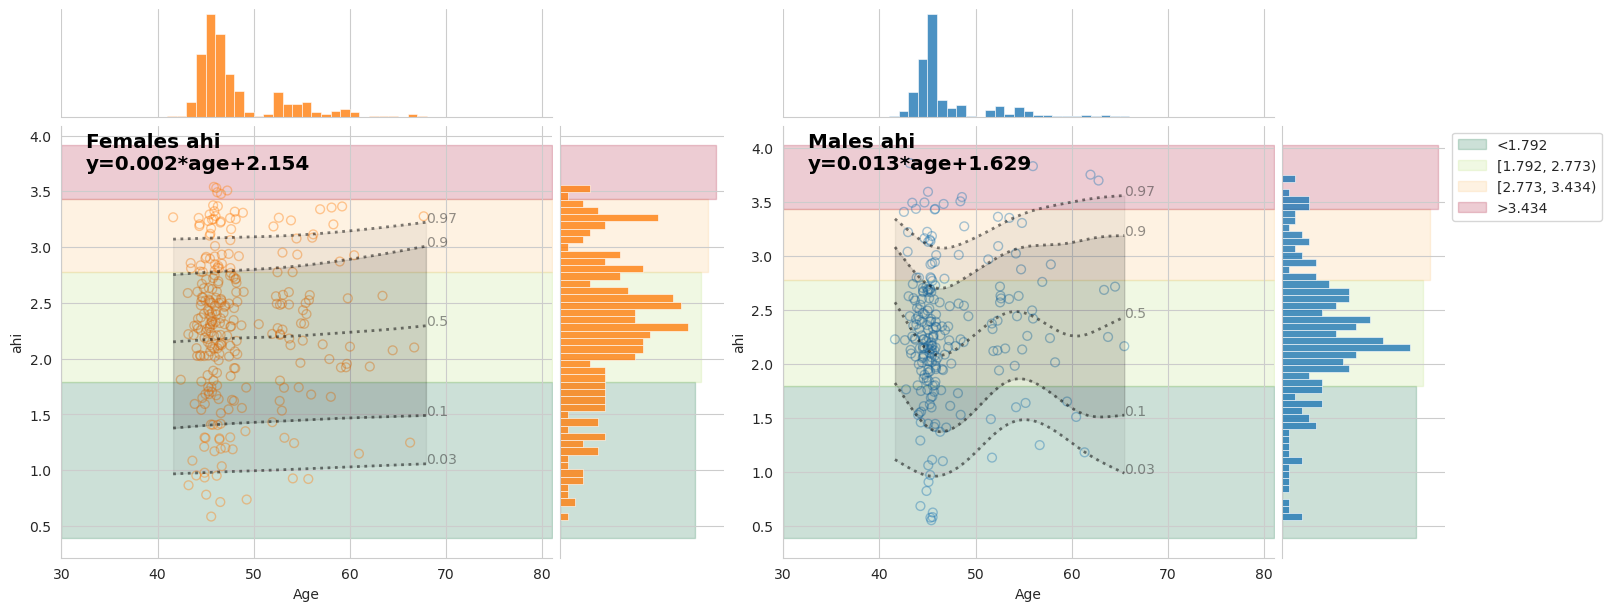

In [ ]:
# AHI clinical thresholds
OSA_NORMAL = 0
OSA_MILD = 5
OSA_MODERATE = 15
OSA_SEVERE = 30

gender_refplots = GenderAgeRefPlot(df.dropna(subset=[col, 'sex', 'age']), col, age_col='age')
gender_refplots.plot()

gender_refplots.plot_thresholds(np.log1p([OSA_NORMAL, OSA_MILD, OSA_MODERATE, OSA_SEVERE, np.inf]), cmap='RdYlGn_r')

# Dates plot

In [17]:
from pheno_utils.dates_plots import dates_dist_plot

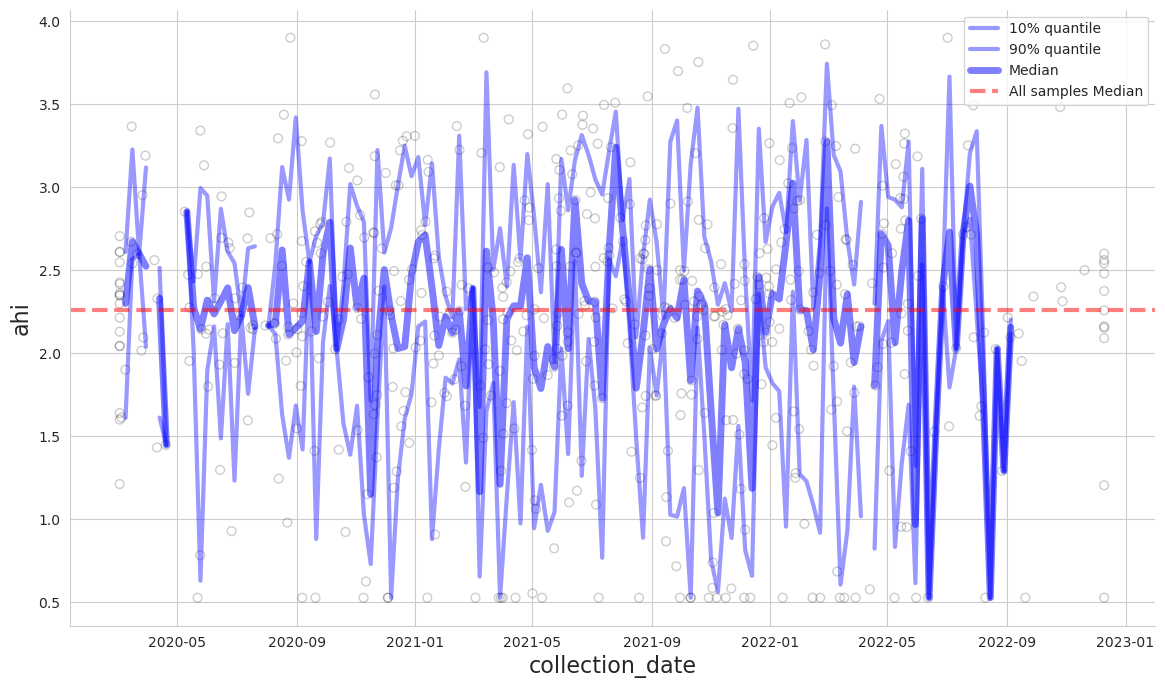

In [18]:
dates_dist_plot(df, col=col, date_col='collection_date')

# Combine diet, CGM and sleep monitoring

The `pheno-utils` package inlcudes a mult-dataset plot that integrates diet logging with CGM and sleep data.

In [19]:
from pheno_utils.diet_plots import plot_diet_cgm_sleep

In [20]:
pid, rs, aidx, data_path = 9183631221, '00_00_visit', 0, 's3://pheno-synthetic-data/data'

try:
    diet = PhenoLoader('diet_logging', base_path=data_path).load_bulk_data(
        'diet_logging_events', research_stage=rs)
except:
    print('No diet data available')
    diet = None
try:
    cgm = PhenoLoader('cgm', base_path=data_path).load_bulk_data(
        'cgm_time_series', research_stage=rs)
except:
    print('No CGM data available')
    cgm = None
try:
    sleep_events = PhenoLoader('sleep', base_path=data_path).load_bulk_data(
        'events_time_series',research_stage=rs)
    sleep_channels = PhenoLoader('sleep', base_path=data_path).load_bulk_data(
        'channels_time_series', research_stage=rs, array_index=aidx)
except:
    print('No sleep events or channels data available')
    sleep_events = None
    sleep_channels = None

/home/ec2-user/projects/pheno-utils/pheno_utils/pheno_loader.py:621: UserWarning: Error joining research_stage: columns overlap but no suffix specified: Index(['sex'], dtype='object')
  warnings.warn(f'Error joining research_stage: {e}')
/home/ec2-user/projects/pheno-utils/pheno_utils/pheno_loader.py:641: UserWarning: No date field found
  warnings.warn(f'No date field found')
/home/ec2-user/projects/pheno-utils/pheno_utils/pheno_loader.py:525: UserWarning: Fields not found: ['collection_date']
  warnings.warn(f'Fields not found: {not_found}')


/home/ec2-user/projects/pheno-utils/pheno_utils/diet_plots.py:251: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wedges = draw_pie_chart(ax, position, y_value, row[pie_nuts].fillna(0.).values, size_value, palette, alpha)
/home/ec2-user/projects/pheno-utils/pheno_utils/diet_plots.py:251: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wedges = draw_pie_chart(ax, position, y_value, row[pie_nuts].fillna(0.).values, size_value, palette, alpha)
/home/ec2-user/projects/pheno-utils/pheno_utils/diet_plots.py:251: FutureWarning: Downcasting object dtype arrays on .

/home/ec2-user/projects/pheno-utils/pheno_utils/timeseries_plots.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  interval = pd.to_timedelta(interval)


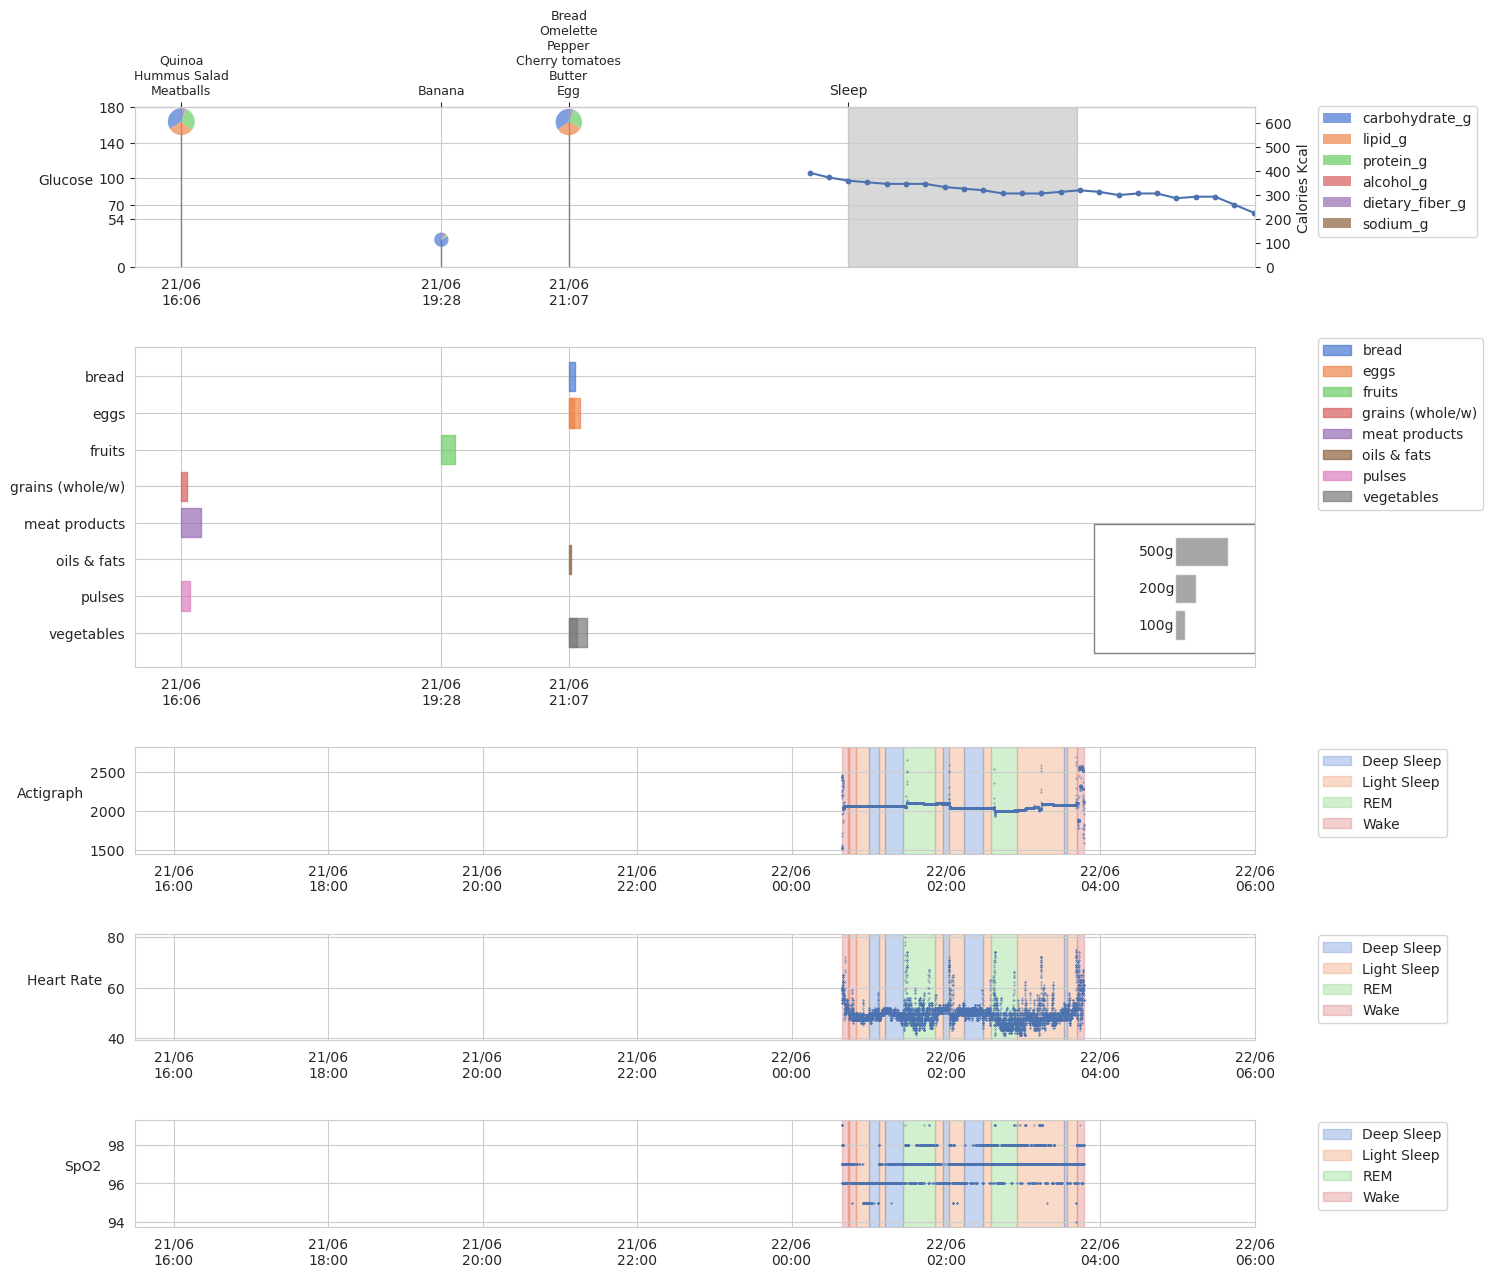

In [21]:
time_range = ('2020-06-21 15:30', '2020-06-22 6:00')
plot_diet_cgm_sleep(diet, cgm, sleep_events, sleep_channels, time_range=time_range)